<a href="https://colab.research.google.com/github/ayeshafirdose31/Cognizant_AI/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 - Exploratory Data Analysis

This notebook will walk you through this task interactively, meaning that once you've imported this notebook into `Google Colab`, you'll be able to run individual cells of code independantly, and see the results as you go.

This notebooks is designed for users that have an understanding of Python and data analysis. There will be some helper functions and initial setup code provided, but it will be up to you to perform the analysis and to draw insights!

---

## Section 1 - Setup

First, we need to mount this notebook to our Google Drive folder, in order to access the CSV data file. If you haven't already, watch this video https://www.youtube.com/watch?v=woHxvbBLarQ to help you mount your Google Drive folder.

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In order to view, analyse and manipulate the dataset, we must load it into something called a `dataframe`, which is a way of storing tabulated data in a virtual table. This dataframe will allow us to analyse the data freely. To load it into a dataframe, we will need a package called `Pandas`. We can install pandas with this command:

In [36]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


And now we can import this package like so:

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import datetime as dt


<ipython-input-37-cd9c9229ee84>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime as dt


---

## Section 2 - Data loading

Now that Google Drive is mounted, you can store the CSV file anywhere in your Drive and update the `path` variable below to access it within this notebook. Once we've updated the `path`, let's read this CSV file into a pandas dataframe and see what it looks like

In [38]:
path = "/content/drive/MyDrive/sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


Using the `.head()` method allows us to see the top 5 (5 by default) rows within the dataframe. We can use `.tail()` to see the bottom 5. If you want to see more than 5 rows, simply enter a number into the parentheses, e.g. `head(10)` or `tail(10)`.

---

## Section 3 - Descriptive statistics

In this section, you should try to gain a description of the data, that is: what columns are present, how many null values exist and what data types exists within each column.

To get you started an explanation of what the column names mean are provided below:

- transaction_id = this is a unique ID that is assigned to each transaction
- timestamp = this is the datetime at which the transaction was made
- product_id = this is an ID that is assigned to the product that was sold. Each product has a unique ID
- category = this is the category that the product is contained within
- customer_type = this is the type of customer that made the transaction
- unit_price = the price that 1 unit of this item sells for
- quantity = the number of units sold for this product within this transaction
- total = the total amount payable by the customer
- payment_type = the payment method used by the customer

After this, you should try to compute some descriptive statistics of the numerical columns within the dataset, such as:

- mean
- median
- count
- etc...

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [40]:
df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [41]:
df.shape


(7829, 9)

In [42]:
df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
7824    False
7825    False
7826    False
7827    False
7828    False
Length: 7829, dtype: bool

In [43]:
df.isnull().sum()


transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

In [44]:


# Extracting Date,Year,Month,Day
df.timestamp = pd.to_datetime(df.timestamp)


In [46]:
df['day'] = df.timestamp.dt.day_name() # Thanks @Mark Wang
df['year'] = df.timestamp.dt.year
df['month'] = df.timestamp.dt.month


In [47]:

df.drop(["product_id"],axis=1,inplace=True)
df.drop(["transaction_id"],axis=1,inplace=True)


In [48]:
df.drop(["timestamp"],axis=1,inplace=True)

# Checking Unique Values

In [49]:
df["day"].unique()

array(['Wednesday', 'Sunday', 'Friday', 'Saturday', 'Monday', 'Tuesday',
       'Thursday'], dtype=object)

In [50]:
df["day"].unique()

array(['Wednesday', 'Sunday', 'Friday', 'Saturday', 'Monday', 'Tuesday',
       'Thursday'], dtype=object)

In [51]:
df["year"].unique()

array([2022])

In [52]:
df["customer_type"].unique()

array(['gold', 'standard', 'premium', 'basic', 'non-member'], dtype=object)

In [53]:
df["category"].unique()

array(['fruit', 'vegetables', 'refrigerated items', 'frozen',
       'spices and herbs', 'canned foods', 'packaged foods',
       'condiments and sauces', 'beverages', 'dairy', 'cheese', 'meat',
       'seafood', 'baked goods', 'baking', 'snacks', 'baby products',
       'pets', 'personal care', 'medicine', 'kitchen',
       'cleaning products'], dtype=object)

In [54]:
df["payment_type"].unique()

array(['e-wallet', 'debit card', 'cash', 'credit card'], dtype=object)

---

## Section 4 - Visualisation

Now that you've computed some descriptive statistics of the dataset, let's create some visualisations. You may use any package that you wish for visualisation, however, some helper functions have been provided that make use of the `seaborn` package. If you wish to use these helper functions, ensure to run the below cells that install and import `seaborn`.

In [55]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
import seaborn as sns

To analyse the dataset, below are snippets of code that you can use as helper functions to visualise different columns within the dataset. They include:

- plot_continuous_distribution = this is to visualise the distribution of numeric columns
- get_unique_values = this is to show how many unique values are present within a column
- plot_categorical_distribution = this is to visualise the distribution of categorical columns
- correlation_plot = this is to plot the correlations between the numeric columns within the data

In [57]:
df.head()

,category,customer_type,unit_price,quantity,total,payment_type,day,year,month
0,fruit,gold,3.99,2,7.98,e-wallet,Wednesday,2022,3
1,fruit,standard,3.99,1,3.99,e-wallet,Sunday,2022,3
2,fruit,premium,0.19,2,0.38,e-wallet,Friday,2022,3
3,fruit,gold,0.19,4,0.76,e-wallet,Wednesday,2022,3
4,fruit,basic,4.49,2,8.98,debit card,Saturday,2022,3


In [61]:
df['customer_type'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7829 entries, 0 to 7828
Series name: customer_type
Non-Null Count  Dtype 
--------------  ----- 
7829 non-null   object
dtypes: object(1)
memory usage: 61.3+ KB


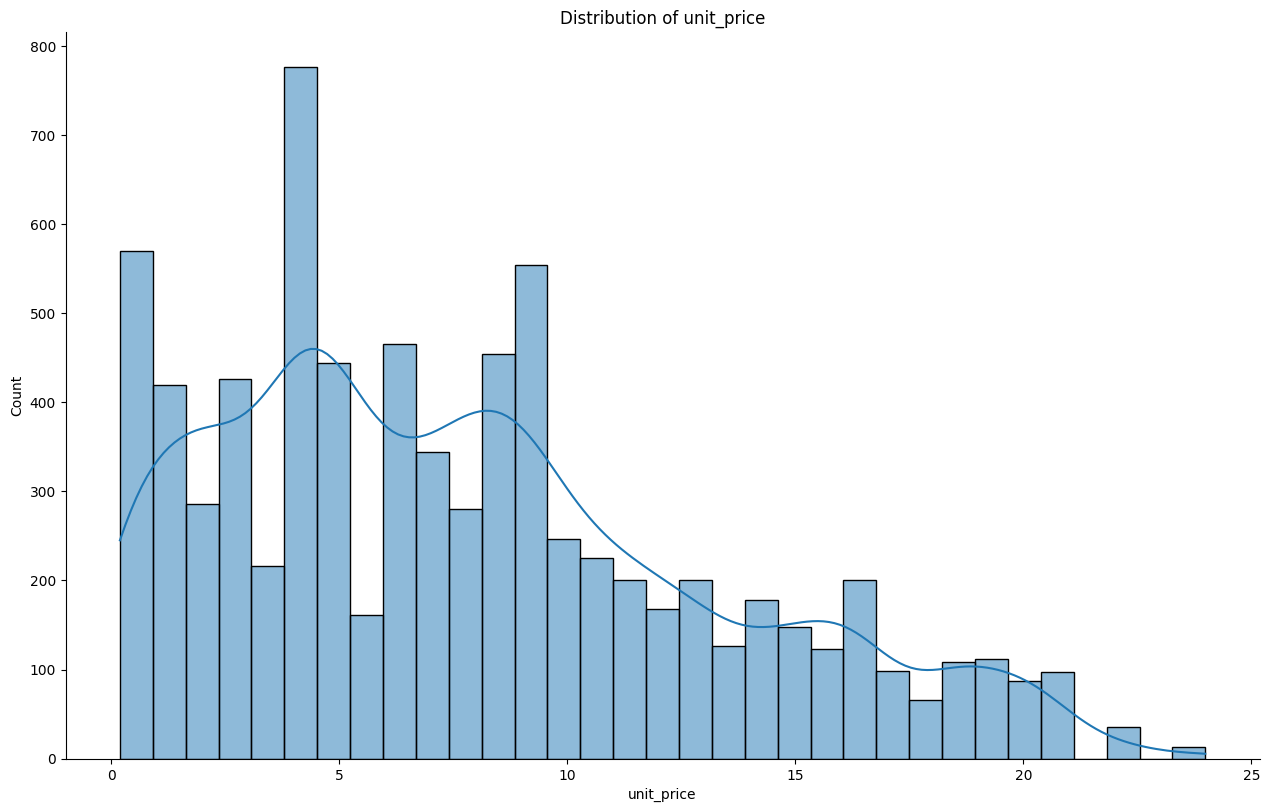

In [68]:
plot_continuous_distribution(df, 'unit_price')


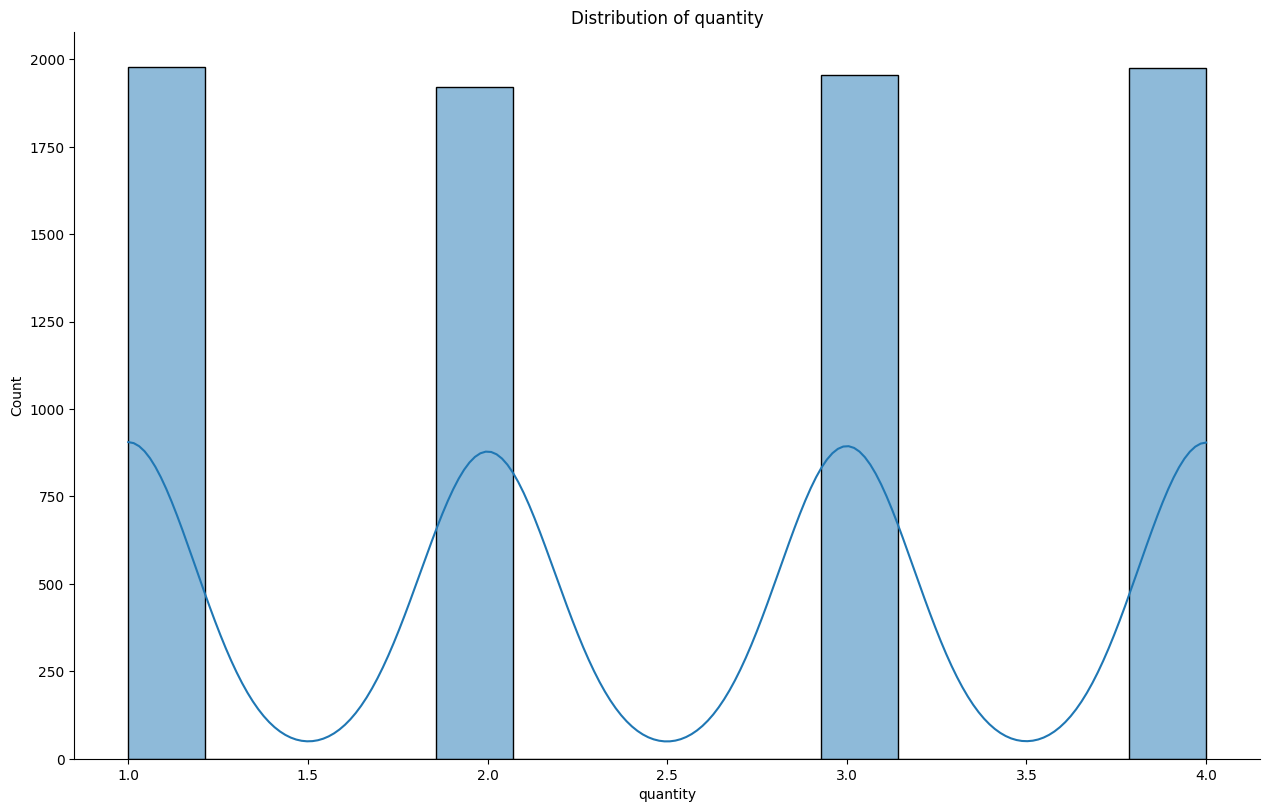

In [69]:
plot_continuous_distribution(df, 'quantity')


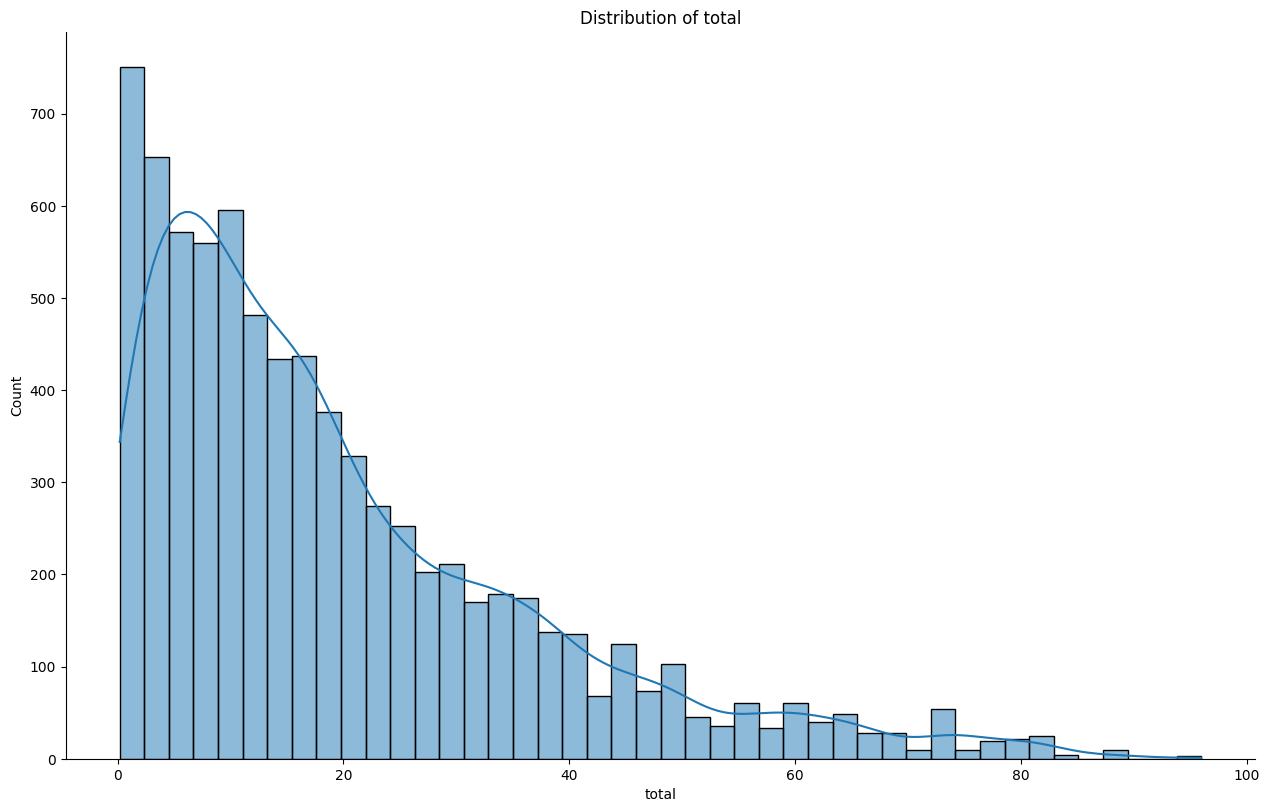

In [70]:
plot_continuous_distribution(df, 'total')


# Univariate Analysis.

<Axes: ylabel='customer_type'>

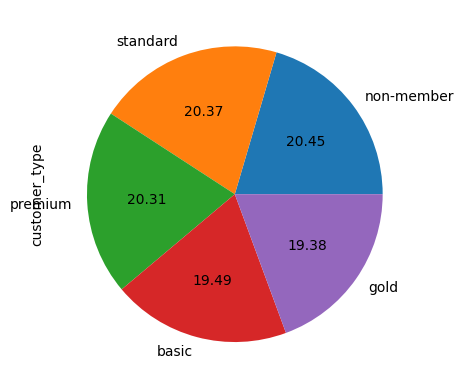

In [74]:
df["customer_type"].value_counts().plot(kind='pie',autopct='%.2f')

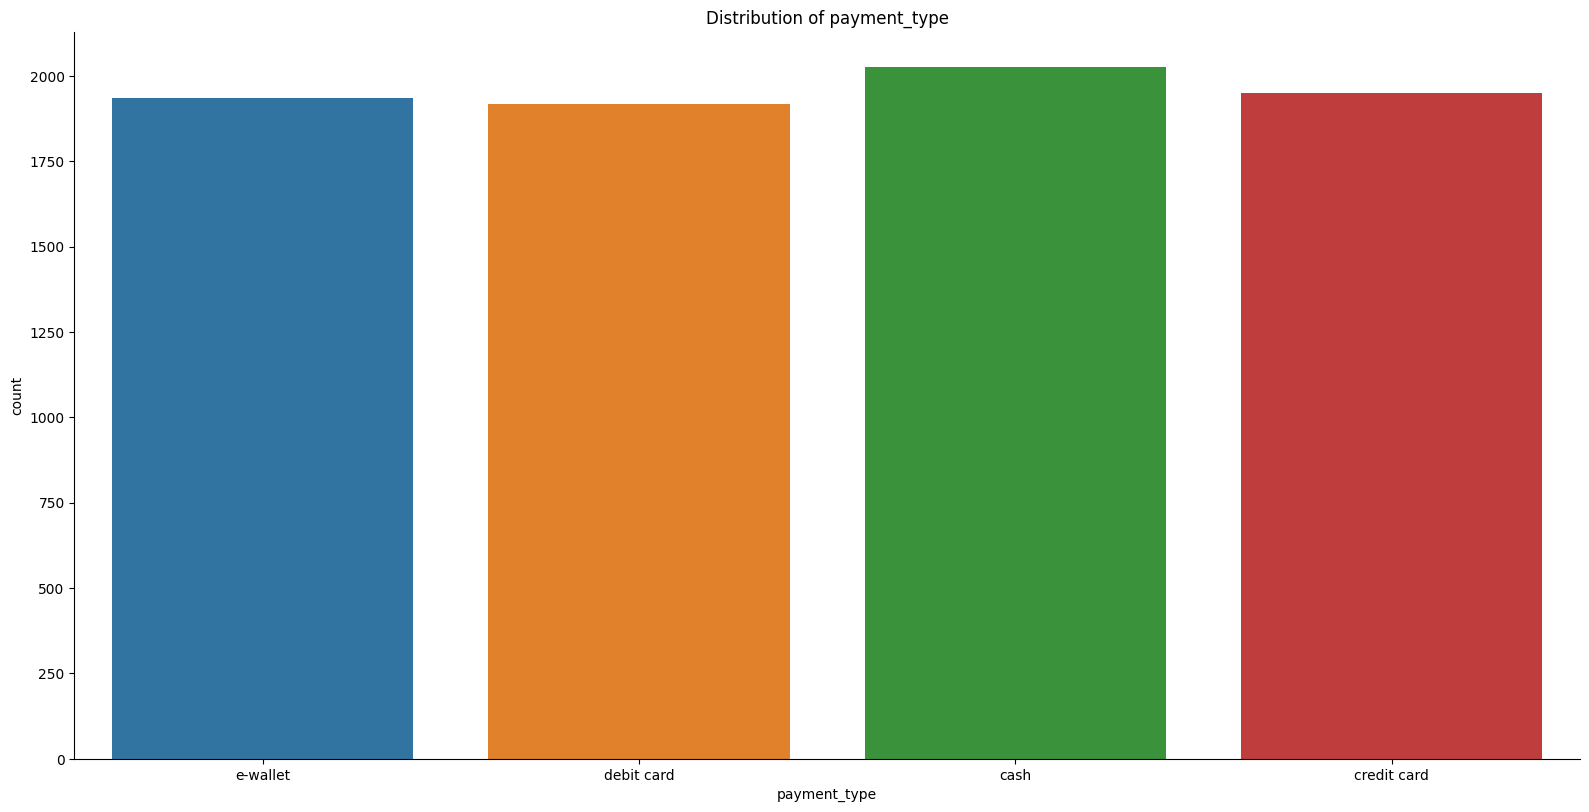

In [71]:
plot_categorical_distribution(df, 'payment_type')
